In [6]:
# Transfer learning for tunnel analysis


In [2]:
import matplotlib.pyplot as plt
from random import randint
import random
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn import svm
import os.path
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers, utils, backend as K
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
import pandas as pd
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [3]:
# loading large dataset DS
# Update path of file after downloading the excel file
DS = pd.read_excel(r'C:\DS1.xlsx')
DS=DS.drop(DS.columns[0], axis=1)
DS=DS.drop(DS.index[0])
DS 

,Insitu Stress (MPa),Plastic Zone Radius (m),Wall Displacement (mm),Young's Modulus (MN/m),Rock Cohesion (MPa),Rock Friction Angle (deg),rock_UCS
1,8.328610,10.168393,136.103115,682.742560,0.364503,29.060359,1.239097
2,11.938866,8.997603,123.684430,905.693479,0.447981,33.601663,1.671021
3,8.147282,8.538484,59.590102,1081.836141,0.580488,29.907311,2.007117
4,11.829580,10.268736,130.667763,1003.876295,0.605632,27.694058,2.003745
5,10.210861,9.891690,143.050230,771.167133,0.417184,30.336991,1.455032
...,...,...,...,...,...,...,...
1997,9.602138,11.494340,143.982065,877.126200,0.504226,24.822848,1.577565
1998,10.385867,7.932688,71.590302,1091.318537,0.471841,36.333959,1.865502
1999,8.620612,7.904598,74.316240,849.691761,0.439608,35.194793,1.695992
2000,9.440241,10.174975,86.749611,1134.030747,0.635178,25.522416,2.014264


In [4]:
# loading small dataset DS2 or DS3.
# Update path afetr downloading Excel file
# Update file name when loading DS3
DS2 = pd.read_excel(r'C:\DS3.xlsx')
DS2=DS2.drop(DS2.columns[0], axis=1)
DS2=DS2.drop(DS2.index[0])
DS2.head() 

,Insitu Stress (MPa),Plastic Zone Radius (m),Wall Displacement (mm),Young's Modulus (MN/m),Rock Cohesion (MPa),Rock Friction Angle (deg),rock_UCS
1,7.969279,7.000000,100.308882,477.804239,0.118631,49.747667,0.647431
2,7.034850,7.593938,146.726411,367.914742,0.104111,44.110835,0.491865
3,7.831849,8.195001,128.085955,522.360537,0.159423,40.111673,0.685513
4,7.888511,7.019032,78.649129,659.131488,0.189502,44.515235,0.904158
5,7.556814,7.629049,100.117152,564.845907,0.172639,41.728919,0.770595
...,...,...,...,...,...,...,...
97,7.555975,7.490546,96.624800,572.394306,0.157968,42.881285,0.724550
98,6.325526,7.670080,110.281593,435.219710,0.132619,41.916227,0.594562
99,7.838844,7.082318,86.753128,607.324542,0.162028,44.963047,0.781627
100,7.090087,7.000000,79.865034,534.517178,0.132106,48.424236,0.695986


In [7]:
# adding noise to dataset 1
noise_sd1=0.05 # standard deviation of noise 
for i in range(len(DS)):
    mu, sigma = 0, noise_sd1 # mean and standard deviation
    noise = np.random.normal(mu, sigma)
    DS.iloc[i,1]=DS.iloc[i,1]*(1+noise)  
    DS.iloc[i,0]=DS.iloc[i,0]*(1+noise) 
    DS.iloc[i,6]=DS.iloc[i,6]*(1+noise) 
    DS.iloc[i,3]=DS.iloc[i,3]*(1+noise) 


In [8]:
X=DS.iloc[:, [0,1,3,6]]
Y=DS.iloc[:, 2]
X=np.array(X)
Y=np.array(Y)

In [9]:
# adding noise to dataset 2
noise_sd2=noise_sd1
for i in range(len(DS2)):
    mu, sigma = 0, noise_sd2 # mean and standard deviation
    noise = np.random.normal(mu, sigma)
    DS2.iloc[i,1]=DS2.iloc[i,1]*(1+noise) # Plastic radius
    DS2.iloc[i,0]=DS2.iloc[i,0]*(1+noise) # in-situ stress
    DS2.iloc[i,6]=DS2.iloc[i,6]*(1+noise) # rock_UCS
    DS2.iloc[i,3]=DS2.iloc[i,3]*(1+noise) # Young's modulus


In [10]:
X2=DS2.iloc[:, [0,1,3,6]]
Y2=DS2.iloc[:, 2]
X2=np.array(X2)
Y2=np.array(Y2)


In [11]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# normalization of data set 1
scaler = MinMaxScaler()
X_trainN1=scaler.fit_transform(X_train)
X_testN1=scaler.fit_transform(X_test)

In [12]:
X_trainNT, X_testNT, y_trainNT, y_testNT = train_test_split(X2, Y2, test_size=0.2, random_state=42)
# normalization of data set 2
scaler = MinMaxScaler()
X_trainNT=scaler.fit_transform(X_trainNT)
X_testNT=scaler.fit_transform(X_testNT)

In [ ]:
# Random forest model
regr_rf = RandomForestRegressor(max_depth=80, random_state=123)
regr_rf.fit(X_trainNT, y_trainNT)
# Predict on new data
y_rf = regr_rf.predict(X_testNT)
forestscoreR=regr_rf.score(X_testNT, y_testNT, sample_weight=None)
rmse = np.sqrt(mean_squared_error(y_testNT, y_rf))

NameError: name 'RandomForestRegressor' is not defined

# Neural network 1

In [457]:
# Number of layers is adjusted manually
def build_model1():
    # Define model layers.
    input_layer = Input(shape=(4))
    first_dense = Dense(units=a1, activation=activ1, kernel_regularizer=regularizers.l1(reg_strength))(input_layer)
    # Y1 output will be fed from the first dense
    # second_dense = Dense(units=a2,activation=activ2, kernel_regularizer=regularizers.l1(reg_strength))(first_dense)
    # third_dense = Dense(units=a3,activation=activ3, kernel_regularizer=regularizers.l1(reg_strength))(second_dense)
    y1_output = Dense(units='1',name='disps', activation=activ2)(first_dense)
    # Define the model with the input layer 
    # and a list of output layers
    model1 = Model(inputs=input_layer,outputs=[y1_output])
    return model1

In [418]:
# Hyper-parameter tuning via random selection
# Can be manually changed to examine other values
ns=20 # number of iterations 
params=[]
L1=['4', '8','16'] # number of nodes 
L2=['32','50','120'] # number of nodes
L=[L1,L2] # Either L1 or L2 are randomly selected
ACT=['relu','softplus'] # activation functions. 
RS=[0,0.01,0.02] # regularization strength
LR=[0.01,0.0001,0.00001] # learning rate
batchSize=[16,32,500] # batch size
for i in range(ns):
    L12=random.choice(L)
    a1=np.random.choice(L12)
    # a2=np.random.choice(L12)
    # a3=np.random.choice(L12)
    activ1=np.random.choice(ACT)
    activ2=np.random.choice(ACT)
    # activ3=np.random.choice(ACT)
    reg_strength = np.random.choice(RS) # regularization
    BS=np.random.choice(batchSize)

    model1 = build_model1()
    # Specify the optimizer, and compile the model with loss functions for both outputs
    lr0=np.random.choice(LR)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr0)
    model1.compile(optimizer='adam',
                  loss='mse', metrics=tf.keras.metrics.RootMeanSquaredError())
    history = model1.fit(X_trainN1, y_train,
                        epochs=1500, batch_size=BS, verbose=0)
    score1=model1.evaluate(X_testN1, y_test, verbose=0)
    score1[1]=round(score1[1],1)
    params1=[a1,activ1,activ2,lr0,reg_strength,BS,score1[1]]
    params.append(params1)
paramsDF = pd.DataFrame(params) # converts list of best parameters to dataframe
paramsDF.columns=['Units L1', 'Activation L1', 'Activation Y',
                                  'Learning rate','Regularization','Batch size','RMSE']
paramsDF # displays hyper-parameters and resultant RMSE 

,Units L1,Activation L1,Activation Y,Learning rate,Regularization,Batch size,RMSE
0,4,relu,relu,0.00001,0.00,500,50.8
1,4,softplus,softplus,0.00010,0.02,16,66.3
2,50,softplus,softplus,0.01000,0.02,500,26.9
3,32,relu,relu,0.00010,0.02,500,25.0
4,4,softplus,relu,0.00001,0.02,16,66.6
5,32,relu,softplus,0.01000,0.01,16,36.4


In [470]:
# ANN after fine-tuning
# Manually select best hyper-parameters
a1='8'
# a2='8'
# a3='4'
activ1='softplus'
activ2='relu'
# activ3='relu'
lr0=0.001
reg_strength=0.05
BS=500
modelFT = build_model1() # fine-tuned model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr0)
modelFT.compile(optimizer='adam', loss='mse', metrics=tf.keras.metrics.RootMeanSquaredError())
history = modelFT.fit(X_trainN1, y_train,
                        epochs=1500, batch_size=BS, verbose=0)
modelFT.evaluate(X_testN1, y_test, verbose=0)

[834.5872802734375, 28.8061466217041]

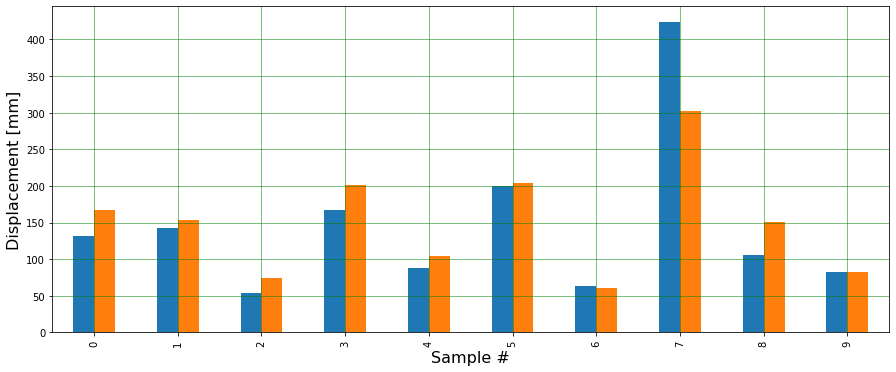

In [471]:
Y_pred = modelFT.predict(X_testN1)
predictions =Y_pred.flatten()


df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

df_temp2 = df_temp2[0:10]
df_temp2.plot(kind='bar',figsize=(15,6),legend=False)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Sample #', fontsize=16)
plt.ylabel('Displacement [mm]', fontsize=16)
plt.show()

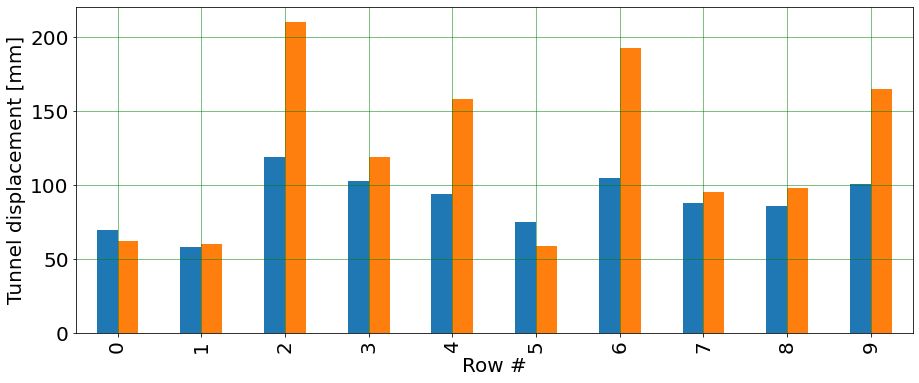

In [472]:
# predicting DS2 without trasfer learning
Y_pred2 = modelFT.predict(X_testNT)
predictions =Y_pred2.flatten()

df_temp2 = pd.DataFrame({'Actual DS2': y_testNT, 'Predicted DS2': predictions})
df_temp2 = df_temp2[0:10]
df_temp2.plot(kind='bar',figsize=(15,6),legend=False)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Row #', fontsize=20)
plt.ylabel('Tunnel displacement [mm]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [473]:
modelFT.evaluate(X_testNT, y_testNT, verbose=0)

[4279.46533203125, 65.38097381591797]

# Transfer Learning

In [474]:
# Freeze the layers of the base model
for layer in modelFT.layers:
    layer.trainable = False

# Create a new Sequential model
modelT = Sequential()
# Add the pre-trained base model to the new model
modelT.add(modelFT)
# Add a new Flatten layer to the model
modelT.add(Flatten())
# Add a new Dense layer to the model
modelT.add(Dense(50, activation='relu'))
modelT.add(Dense(units='1',name='disps'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
modelT.compile(optimizer='adam', 
               loss='mse', metrics=tf.keras.metrics.RootMeanSquaredError())


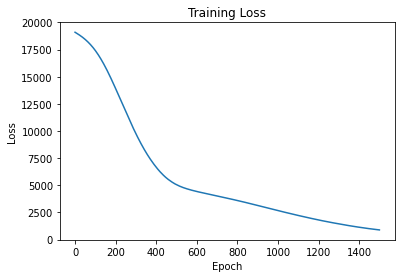

In [475]:
# Train model on new data
historyT = modelT.fit(X_trainNT, y_trainNT, 
                      epochs=1500, batch_size=50, verbose=0)
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [476]:
modelT.evaluate(X_testNT, y_testNT, verbose=2)

1/1 - 0s - loss: 583.8458 - root_mean_squared_error: 24.0635 - 78ms/epoch - 78ms/step


[583.8458251953125, 24.063512802124023]

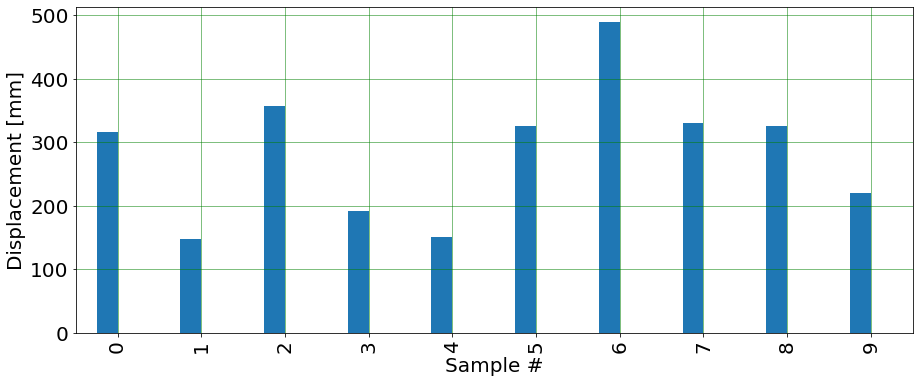

In [448]:
# predicting DS2 
Y_pred2 = modelT.predict(X_testNT)
predictionsT = Y_pred2.flatten()


df_temp2 = pd.DataFrame({'Actual DS2': y_testNT, 'Predicted DS2': predictionsT})

df_temp2 = df_temp2[0:10]
df_temp2.plot(kind='bar',figsize=(15,6),legend=False)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Sample #', fontsize=20)
plt.ylabel('Displacement [mm]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [357]:



def build_modelT():
    # Freeze the layers of the base model
    for layer in modelFT.layers:
        layer.trainable = False
        # Create a new Sequential model
        modelT = Sequential()
        # Add the pre-trained base model to the new model
        modelT.add(modelFT)
        # Add a new Flatten layer to the model
        modelT.add(Flatten())
        # Add a new Dense layer to the model
        modelT.add(Dense(units=a1, kernel_regularizer=regularizers.l1(reg_strength), activation=activ1))
        modelT.add(Dense(units='1',name='disps'))
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr0)
        modelT.compile(optimizer='adam', 
                       loss='mse', metrics=tf.keras.metrics.RootMeanSquaredError())
    return modelT


In [369]:
# Hyperparameter tuning
ns=4
params=[]
L1=['2', '7','8']
L2=['12','50','100']
L=[L1,L2]
ACT=['relu','sigmoid','tanh']
RS=[0,0.02,0.04]
LR=[0.01,0.0001,0.00001]
batchSize=[32,500]
for i in range(ns):
    L12=random.choice(L)
    a1=np.random.choice(L12)
    # a2=np.random.choice(L12)
    # a3=np.random.choice(L12)
    activ1=np.random.choice(ACT)
    # activ2=np.random.choice(ACT)
    # activ3=np.random.choice(ACT)
    reg_strength = np.random.choice(RS) # regularization
    BS=np.random.choice(batchSize)

    lr0=np.random.choice(LR)
    modelT = build_modelT()
    # Specify the optimizer, and compile the model with loss functions for both outputs
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr0)
    model1.compile(optimizer='adam',
                  loss='mse', metrics=tf.keras.metrics.RootMeanSquaredError())
    history = model1.fit(X_trainN1, y_train,
                        epochs=1700, batch_size=BS, verbose=0)
    score1=model1.evaluate(X_testN1, y_test, verbose=0)
    score1[1]=round(score1[1],1)
    params1=[a1,activ1,lr0,reg_strength,BS,score1[1]]
    params.append(params1)
paramsDF = pd.DataFrame(params) # converts list of best parameters to dataframe
paramsDF.columns=['Units L1', 'Activation L1', 
                                  'Learning rate','Regularization','Batch size','RMSE']
paramsDF

,Units L1,Activation L1,Learning rate,Regularization,Batch size,RMSE
0,2,tanh,0.00001,0.04,32,76.7
1,12,sigmoid,0.00010,0.02,500,77.2
2,100,sigmoid,0.01000,0.00,32,77.1
3,7,relu,0.00001,0.02,500,77.3
